## ***The Three Datasets*** 

I present below the three datasets I have chosen. My 'big' dataset is one which shows us the mileage, cylinders (in the engine), horsepower produced and weight (in lbs) of some popular American road cars. My second dataset is one which shows us the waiting time, and spout duration of some geysers around the world, and this is the dataset we intend to use to study dichotomous data. Our last ('small') dataset is the first of the four famous datatsets described by F.J. Anscombe in his work *Graphs in Statistical Analysis* (1973). 



In [124]:
import seaborn as sns
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt

cars = sns.load_dataset('mpg')

In [127]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [96]:
#checking if there are any missing values
for col in cars.columns:
  missing=np.mean(cars[col].isnull())
  print('{} -{}%'.format(col, missing))
#so, we found that there are some missing values in colomn horsepower with (0.015%)

mpg -0.0%
cylinders -0.0%
displacement -0.0%
horsepower -0.01507537688442211%
weight -0.0%
acceleration -0.0%
model_year -0.0%
origin -0.0%
name -0.0%


In [97]:
#let us replace the null value with mean

cars['horsepower'].fillna(cars["horsepower"].mean(),inplace=True)

In [98]:
mpg = cars[['mpg', 'cylinders', 'horsepower','acceleration', 'weight']]

In [128]:
mpg.head()

,mpg,cylinders,horsepower,acceleration,weight
299,27,4,71.0,24.8,3190
394,44,4,52.0,24.6,2130
326,43,4,48.0,23.7,2335
59,23,4,54.0,23.5,2254
300,23,8,90.0,22.2,3420


In [129]:
print(mpg.describe())

              mpg   cylinders  horsepower  acceleration       weight
count  398.000000  398.000000  398.000000    398.000000   398.000000
mean    23.349246    5.454774  104.469388     15.568090  2970.424623
std      7.752542    1.701004   38.199187      2.757689   846.841774
min      9.000000    3.000000   46.000000      8.000000  1613.000000
25%     17.000000    4.000000   76.000000     13.825000  2223.750000
50%     23.000000    4.000000   95.000000     15.500000  2803.500000
75%     29.000000    8.000000  125.000000     17.175000  3608.000000
max     46.000000    8.000000  230.000000     24.800000  5140.000000


In [130]:
print(type(mpg.describe()))

<class 'pandas.core.frame.DataFrame'>


In [131]:
# We notice that our descriptives had mode and median missing. We now go about adding those to the descriptive dataframe.
df_mode=mpg.mode()
df_mode=df_mode.drop(1)
df_mode.index=['Mode']
#df_mode
frames = [mpg.describe(), df_mode] 
result = pd.concat(frames)
display(result)

,mpg,cylinders,horsepower,acceleration,weight
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.349246,5.454774,104.469388,15.568090,2970.424623
std,7.752542,1.701004,38.199187,2.757689,846.841774
min,9.000000,3.000000,46.000000,8.000000,1613.000000
25%,17.000000,4.000000,76.000000,13.825000,2223.750000
50%,23.000000,4.000000,95.000000,15.500000,2803.500000
75%,29.000000,8.000000,125.000000,17.175000,3608.000000
max,46.000000,8.000000,230.000000,24.800000,5140.000000
Mode,18.000000,4.000000,150.000000,14.500000,1985.000000


In [132]:
#Adding Median values to the dataframe.

df_median=pd.DataFrame(mpg.median())
df_median=df_median.transpose()
df_median.index=['Median']
#df_median
frames = [result, df_median] 
result = pd.concat(frames)
display(result)
 

,mpg,cylinders,horsepower,acceleration,weight
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.349246,5.454774,104.469388,15.568090,2970.424623
std,7.752542,1.701004,38.199187,2.757689,846.841774
min,9.000000,3.000000,46.000000,8.000000,1613.000000
25%,17.000000,4.000000,76.000000,13.825000,2223.750000
50%,23.000000,4.000000,95.000000,15.500000,2803.500000
75%,29.000000,8.000000,125.000000,17.175000,3608.000000
max,46.000000,8.000000,230.000000,24.800000,5140.000000
Mode,18.000000,4.000000,150.000000,14.500000,1985.000000
Median,23.000000,4.000000,95.000000,15.500000,2803.500000


Text(0, 0.5, 'mpg')

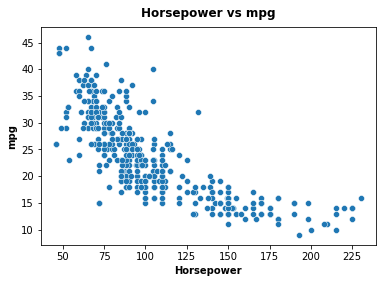

In [133]:
# We present here a very brief summary of the dataset, and a small statistical visualisation, wherein we plot the horsepower of the cars against their mileage.
sns.scatterplot(y = 'mpg', x = 'horsepower', data = mpg)
plt.title('Horsepower vs mpg',fontweight='bold',y=1.02)
plt.xlabel('Horsepower',fontweight='bold')
plt.ylabel('mpg',fontweight='bold')

Text(0, 0.5, 'mpg')

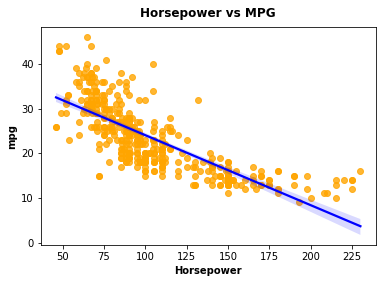

In [134]:
# Here, we observe the same plot as above, but with a line of best fit added in as well.

sns.regplot(y = 'mpg', x = 'horsepower', data = mpg, scatter_kws={"color":"orange"},line_kws={"color":"blue"})
plt.title('Horsepower vs MPG',fontweight='bold',y=1.02)
plt.xlabel('Horsepower',fontweight='bold')
plt.ylabel('mpg',fontweight='bold')

Text(0, 0.5, 'Acceleration')

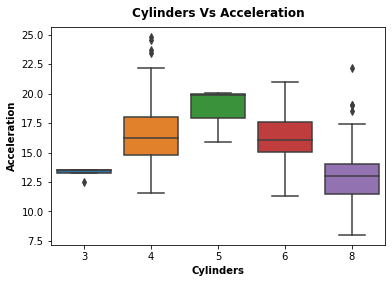

In [135]:
# I decided to visualise a boxplot between two parameters, the number of cylinders a car had, and its acceleration. While we expected a downward
# trend (increased cylinders mean increased power, which one would assume translates to increased acceleration), this is not strictly the case,
# leading us to believe that other factors (mainly weight, perhaps) have a role to play here.

sns.boxplot(data = mpg, x = 'cylinders', y = 'acceleration')
plt.title('Cylinders Vs Acceleration',fontweight='bold',y=1.02)
plt.xlabel('Cylinders',fontweight='bold')
plt.ylabel('Acceleration',fontweight='bold')

In [136]:
#checking the data types of columns in data frame cars

mpg.dtypes

mpg               int64
cylinders         int64
horsepower      float64
acceleration    float64
weight            int64
dtype: object

In [138]:
#changing the data types according to our requirement  
mpg['mpg']=mpg['mpg'].astype('int64')
                                  
cars['displacement']=cars['displacement'].astype('int64')

In [140]:
#changed data frame

mpg.head()

,mpg,cylinders,horsepower,acceleration,weight
299,27,4,71.0,24.8,3190
394,44,4,52.0,24.6,2130
326,43,4,48.0,23.7,2335
59,23,4,54.0,23.5,2254
300,23,8,90.0,22.2,3420


In [143]:
#lets arrange the data by acceleration in descending order

mpg=mpg.sort_values(by=['acceleration'], inplace=False, ascending=False)

mpg.head() #I am putting .head(), so that it takes less storage and can upload it in github. To check just remove .head() 

,mpg,cylinders,horsepower,acceleration,weight
299,27,4,71.0,24.8,3190
394,44,4,52.0,24.6,2130
326,43,4,48.0,23.7,2335
59,23,4,54.0,23.5,2254
300,23,8,90.0,22.2,3420


In [111]:
#viewing all the rows

#pd.set_option('display.max_rows',None)


In [144]:
#checking which are all the countries that are the origins of cars in the given data

cars['origin'].drop_duplicates().sort_values(ascending=False)

0        usa
14     japan
19    europe
Name: origin, dtype: object

In [145]:
#checking corelations
cars.corr()

#there are three methods ('pearson', 'kendall', 'spearman')
#default method is 'pearson'

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804196,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804196,0.950721,1.000000,0.897255,0.932826,-0.543684,-0.370147
horsepower,-0.778427,0.842983,0.897255,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932826,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370147,-0.416361,-0.306564,0.288137,1.000000


In [147]:
#cars['name'].drop_duplicates().sort_values(ascending=False)

Text(33.0, 0.5, 'Car Features')

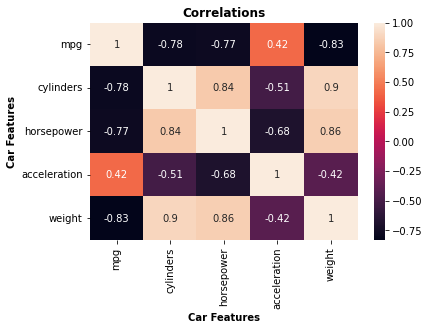

In [148]:
#Let us make it easy to understand by visualising the correlations
#The following code gives us the heatmap. This gives us some really interesting insights into how these data points are connected.

correlation_matrix=mpg.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlations',fontweight='bold',y=1.02)
plt.xlabel('Car Features',fontweight='bold')
plt.ylabel('Car Features',fontweight='bold')


In [150]:
#numerising the object types also
cars_numerised=cars

for col_name in cars_numerised.columns:
  if(cars_numerised[col_name].dtype=='object'):
    cars_numerised[col_name]=cars_numerised[col_name].astype('category')
    cars_numerised[col_name]=cars_numerised[col_name].cat.codes

cars_numerised.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307,130.0,3504,12.0,70,2,49
1,15.0,8,350,165.0,3693,11.5,70,2,36
2,18.0,8,318,150.0,3436,11.0,70,2,231
3,16.0,8,304,150.0,3433,12.0,70,2,14
4,17.0,8,302,140.0,3449,10.5,70,2,161


In [117]:
#Now we will be able to see the correlation with object type columns also

cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
mpg,1.000000,-0.775396,-0.804196,-0.771543,-0.831741,0.420289,0.579267,-0.482619,0.273936
cylinders,-0.775396,1.000000,0.950721,0.839061,0.896017,-0.505419,-0.348746,0.551378,-0.275754
displacement,-0.804196,0.950721,1.000000,0.893758,0.932826,-0.543684,-0.370147,0.591122,-0.292055
horsepower,-0.771543,0.839061,0.893758,1.000000,0.860676,-0.684376,-0.411750,0.442250,-0.233070
weight,-0.831741,0.896017,0.932826,0.860676,1.000000,-0.417457,-0.306564,0.521088,-0.255247
acceleration,0.420289,-0.505419,-0.543684,-0.684376,-0.417457,1.000000,0.288137,-0.257365,0.128285
model_year,0.579267,-0.348746,-0.370147,-0.411750,-0.306564,0.288137,1.000000,-0.075409,0.074761
origin,-0.482619,0.551378,0.591122,0.442250,0.521088,-0.257365,-0.075409,1.000000,-0.437807
name,0.273936,-0.275754,-0.292055,-0.233070,-0.255247,0.128285,0.074761,-0.437807,1.000000


Text(32.09375, 0.5, 'Car Features')

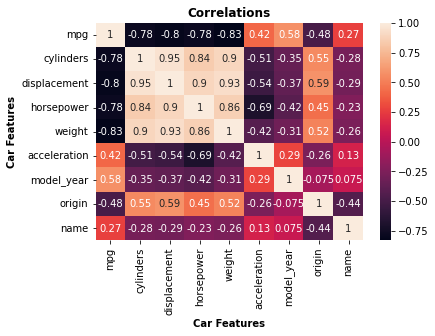

In [151]:
correlation_matrix=cars_numerised.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlations',fontweight='bold',y=1.02)
plt.xlabel('Car Features',fontweight='bold')
plt.ylabel('Car Features',fontweight='bold') 

In [153]:
corr_mat=cars_numerised.corr()

corr_pairs=corr_mat.unstack()

corr_pairs.head()

mpg  mpg             1.000000
     cylinders      -0.775396
     displacement   -0.804196
     horsepower     -0.778427
     weight         -0.831741
dtype: float64

In [154]:
sorted_pairs=corr_pairs.sort_values()

sorted_pairs.head()

weight        mpg            -0.831741
mpg           weight         -0.831741
              displacement   -0.804196
displacement  mpg            -0.804196
mpg           horsepower     -0.778427
dtype: float64

In [155]:
#checking the features that has correlation above 0.5

high_corr=sorted_pairs[(sorted_pairs)>0.5] 
high_corr1=high_corr[(sorted_pairs)<1] 
high_corr1.head()


origin     weight        0.521088
weight     origin        0.521088
origin     cylinders     0.551378
cylinders  origin        0.551378
mpg        model_year    0.579267
dtype: float64

Text(0, 0.5, 'Density')

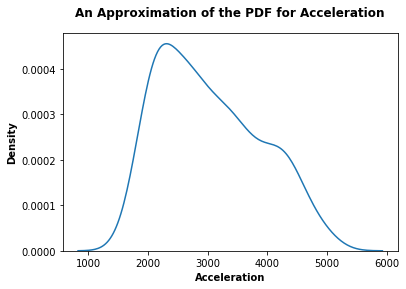

In [158]:
#acceleartion, (continuous) We aim here to plot an approximate probability density function for our continuous random variable, acceleration.

df=mpg.groupby('weight').weight.count()
#df.head()
sns.kdeplot(x = 'weight', data = df)
plt.title('An Approximation of the PDF for Acceleration',y=1.05,fontweight='bold')
plt.xlabel('Acceleration',fontweight='bold')
plt.ylabel('Density',fontweight='bold')

The mean weight of our population is: 2970.424623115578 and the variance of the weight of our population is: 717140.9905256763


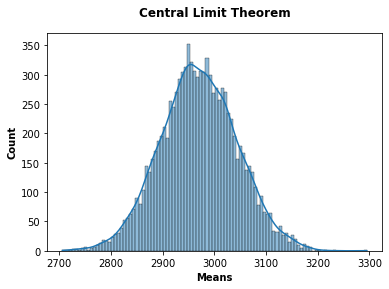

In [159]:
# A note to the reader: The sample size we use here is 100. We also conduct 10000 simple random sample trials, in order to better appreciate how the central limit theorem works. The user can change this as per their convenience
# as well.

import seaborn as sns
import pandas as pd
import random as rd
cars = sns.load_dataset('mpg')
mpg = cars[['mpg', 'cylinders', 'horsepower', 'weight']]
def clt(n):
  means = []
  var  = []
  for i in range(n):
    l = rd.sample(range(0, 398), 100)
    #means = means + [mpg.loc[l, 'mpg'].mean()]
    #means = means + [mpg.loc[l, 'cylinders'].mean()]
    #means = means + [mpg.loc[l, 'horsepower'].mean()]
    means = means + [mpg.loc[l, 'weight'].mean()]
    #var = var + [(mpg.loc[l, 'mpg'].std())**2]
    #var = var + [(mpg.loc[l, 'cylinders'].std())**2]
    #var = var + [(mpg.loc[l, 'horsepower'].std())**2]
    var = var + [(mpg.loc[l, 'weight'].std())**2]
  return pd.Series(means), pd.Series(var)

  # Note, this particular function returns both mean and variance of whichever column the user specifies. In order to access a particular summary statistic, say the variance of mpg, the user must simply 
  # remove the hash from that particular line of code, comment out the current variance line (i.e., the one showing the variance of the weight column), and change the number 0 to 1 (0 gives us the mean of whichever column we choose,
  # and 1 gives us the variance) inside the square bracket next to the clt function in the histplot line below. 

thm = sns.histplot(data = clt(10000)[0], bins = 100, kde = True)
thm.set_xlabel("Means",fontweight='bold')
thm.set_ylabel("Count",fontweight='bold')
plt.title('Central Limit Theorem',y=1.05,fontweight='bold')
print('The mean weight of our population is:', mpg['weight'].mean(), "and the variance of the weight of our population is:", (mpg['weight'].std())**2)



Above, we see a demonstration of the Central Limit Theorem, using the mean of a simple random sample of the weight column of our dataset mpg as a random variable. We see that the mean weight of our population is approximately 2970 lbs, which is also reflected in the graph obtained above.

# ***Dichotomous Dataset***


In [160]:
import seaborn as sns
import pandas as pd
import random as rd
geyser = sns.load_dataset('geyser')
def geyser_convert(n):
  if n == 'long':
    return 1
  else:
    return 0
geyser['kind'] = geyser['kind'].apply(geyser_convert)
geyser_dic = geyser['kind'] # We take only the column of our dataset which has dichotomous data in this analysis, since this is all we need for the moment. 
geyser_dic.describe()

count    272.000000
mean       0.632353
std        0.483053
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: kind, dtype: float64

In [161]:
geyser.groupby('kind').kind.count()


kind
0    100
1    172
Name: kind, dtype: int64

Text(0, 0.5, 'Count')

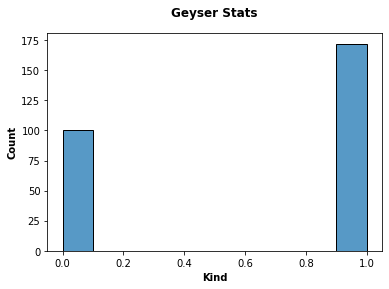

In [162]:
# lets present below a statistical visualisation of our dataset in terms of a histogram plot.
import seaborn as sns
import pandas as pd
import random as rd
sns.histplot(data = geyser_dic)
plt.title('Geyser Stats',y=1.05,fontweight='bold')
plt.xlabel('Kind',fontweight='bold')
plt.ylabel('Count',fontweight='bold')

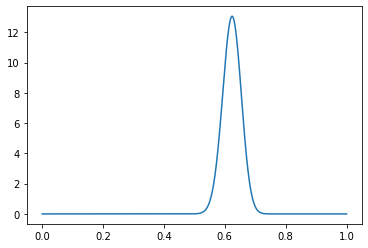

In [163]:
# Bayesian Updating

# Here, we describe a procedure for Bayesian updating. We conduct just one Bayesian trial, simply because coding multiple trials is a bit of
# an involved process, particularly if the prior distribution is a continuous distribution, like it is in this case (we use a Uniform [0, 1] prior
# here). We assume the trials conducted are binomial trials, with the parameter p following a uniform [0, 1] distribution. Following the trial, 
# we plot the probability density function obtained for the parameter p. 


# Attached below is a code for numeric integration.
import numpy as np
import matplotlib.pyplot as plt
def mid_integral(f, a, b, n, p, q):
   integral_sum = 0
   final_integral = 0
   for i in range(1, n+1):
    
        integral_sum = integral_sum + f(a + (i*(b-a))/n, p, q)
    
   final_integral = ((b-a)/n)*(integral_sum) 
   return final_integral

# Defining the binomial probability function.   
def f(p, n, x):
  return (p**x)*((1-p)**(n - x))

# We present below a code for one Bayesian Update of our parameter, and plot its probability density function.
def bayes_update(n):
    l = rd.sample(list(geyser['kind']), n)
    s = sum(l)
    p = np.linspace(0, 1, 10000)
    fp = f(p, n, s)/mid_integral(f, 0, 1, 10007, n, s)
    plt.plot(p, fp)
bayes_update(250)
#mid_integral(f, 0, 1, 10000, 5, 3)

# ***Small Dataset***

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000


Text(0, 0.5, 'y')

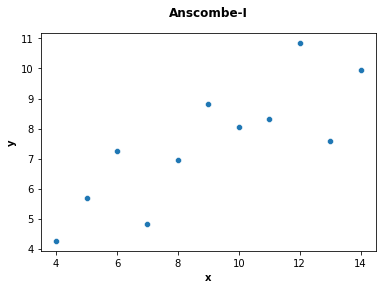

In [164]:

anscombe = sns.load_dataset('anscombe')
anscombe1 = anscombe.loc[anscombe['dataset'] == 'I']

# We now present a description of our dataset below.

print(anscombe1.describe())

# We also plot a scatterplot between the x and y values of our dataset, since lineplots for this particualar dataset are freely available.


sns.scatterplot(x = 'x', y = 'y', data = anscombe1)
plt.title('Anscombe-I',y=1.05,fontweight='bold')
plt.xlabel('x',fontweight='bold')
plt.ylabel('y',fontweight='bold')

In [165]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000


Text(0, 0.5, 'y')

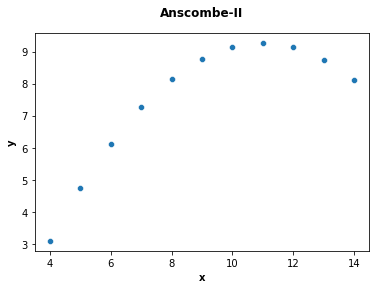

In [166]:

anscombe = sns.load_dataset('anscombe')
anscombe2 = anscombe.loc[anscombe['dataset'] == 'II']

# We now present a description of our dataset below.

print(anscombe2.describe())

# We also plot a scatterplot between the x and y values of our dataset, since lineplots for this particualar dataset are freely available.

sns.scatterplot(x = 'x', y = 'y', data = anscombe2)
plt.title('Anscombe-II',y=1.05,fontweight='bold')
plt.xlabel('x',fontweight='bold')
plt.ylabel('y',fontweight='bold')

               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000


Text(0, 0.5, 'y')

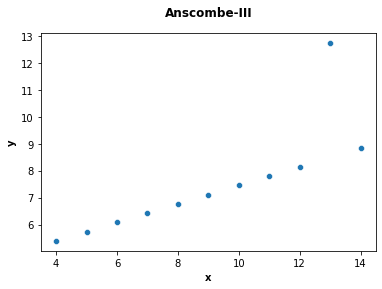

In [170]:

anscombe = sns.load_dataset('anscombe')
anscombe3 = anscombe.loc[anscombe['dataset'] == 'III']

# We now present a description of our dataset below.

print(anscombe3.describe())

# We also plot a scatterplot between the x and y values of our dataset, since lineplots for this particualar dataset are freely available.

sns.scatterplot(x = 'x', y = 'y', data = anscombe3)
plt.title('Anscombe-III',y=1.05,fontweight='bold')
plt.xlabel('x',fontweight='bold')
plt.ylabel('y',fontweight='bold')

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12.500000


Text(0, 0.5, 'y')

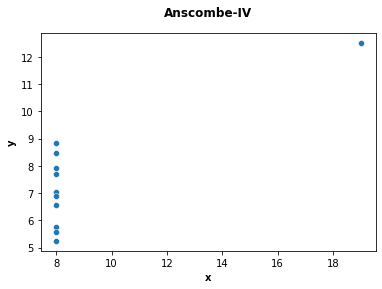

In [169]:

anscombe = sns.load_dataset('anscombe')
anscombe4 = anscombe.loc[anscombe['dataset'] == 'IV']

# We now present a description of our dataset below.

print(anscombe4.describe())

# We also plot a scatterplot between the x and y values of our dataset, since lineplots for this particualar dataset are freely available.

sns.scatterplot(x = 'x', y = 'y', data = anscombe4)
plt.title('Anscombe-IV',y=1.05,fontweight='bold')
plt.xlabel('x',fontweight='bold')
plt.ylabel('y',fontweight='bold')